In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_2'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
class SigmoidNeuron:
  
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")
  
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
      
        if display_loss:
            loss = {}
    
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
      
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
            if loss_fn == "mse":
                loss[i] = mean_squared_error(Y, Y_pred)
            elif loss_fn == "ce":
                loss[i] = log_loss(Y, Y_pred)
    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
        if loss_fn == "mse":
            plt.ylabel('Mean Squared Error')
        elif loss_fn == "ce":
            plt.ylabel('Log Loss')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [4]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [5]:
languages = ['ta', 'hi', 'en']

images_train = read_all("../input/level_2_train/"+LEVEL+"/"+"background", key_prefix='bgr_')  # change the path

for language in languages:
    images_train.update(read_all("../input/level_2_train/"+LEVEL+"/"+language, key_prefix=language+"_" ))
  #print("images_train",images_train,"language",language)
print(len(images_train))


images_test = read_all("../input/level_2_test/kaggle_"+LEVEL, key_prefix='') # change the path
print(len(images_test))

Reading:



Reading:



Reading:



Reading:



900
Reading:



300


In [6]:
list(images_test.keys())[:5]

['39', '150', '199', '146', '281']

In [7]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
    ID_test.append(int(key))
    X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(900, 256) (900,)
(300, 256)


In [8]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [9]:
#sn_mse = SigmoidNeuron()
#sn_mse.fit(X_scaled_train, Y_train, epochs=500, learning_rate=0.09, loss_fn="mse", display_loss=True)

In [10]:
sn_ce = SigmoidNeuron()
#sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.005, loss_fn="ce", display_loss=True)

In [11]:
def print_accuracy(sn):
    Y_pred_train = sn.predict(X_scaled_train)
    Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
    accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
    print("Train Accuracy : ", accuracy_train)
    print("-"*50)
    return accuracy_train

In [12]:
#print_accuracy(sn_mse)
#print_accuracy(sn_ce)

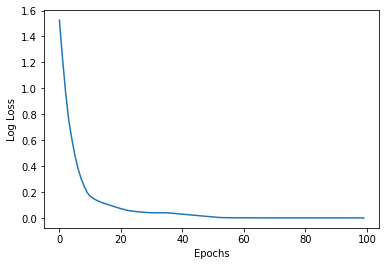

Train Accuracy :  1.0
--------------------------------------------------


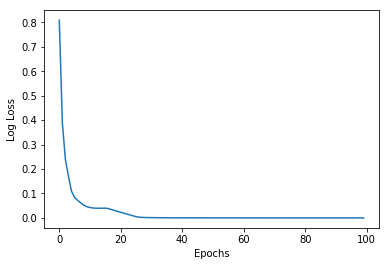

Train Accuracy :  1.0
--------------------------------------------------


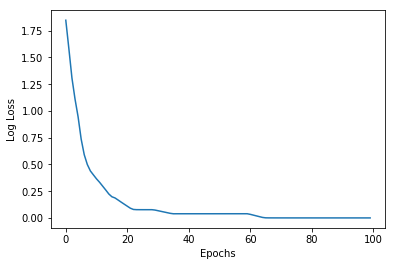

Train Accuracy :  1.0
--------------------------------------------------


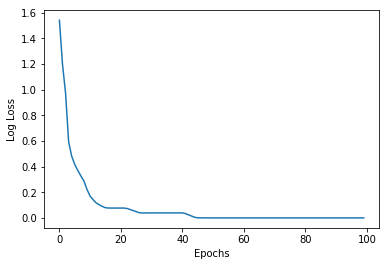

Train Accuracy :  1.0
--------------------------------------------------


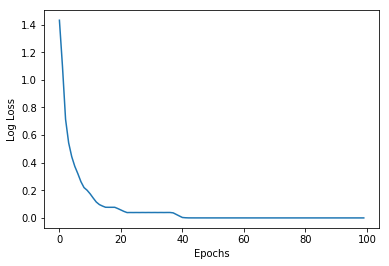

Train Accuracy :  1.0
--------------------------------------------------


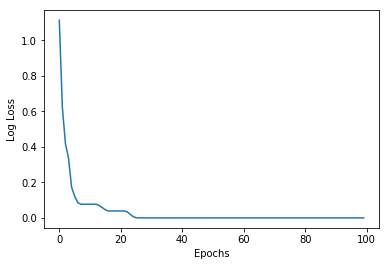

Train Accuracy :  1.0
--------------------------------------------------


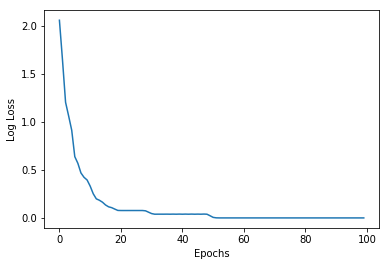

Train Accuracy :  1.0
--------------------------------------------------


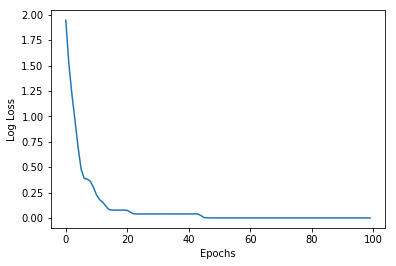

Train Accuracy :  1.0
--------------------------------------------------


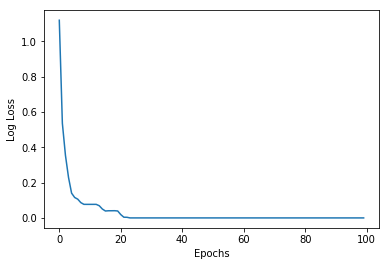

Train Accuracy :  1.0
--------------------------------------------------


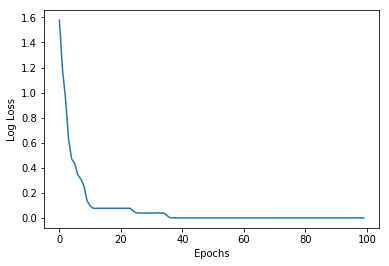

Train Accuracy :  1.0
--------------------------------------------------


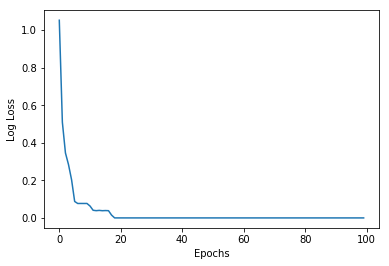

Train Accuracy :  1.0
--------------------------------------------------


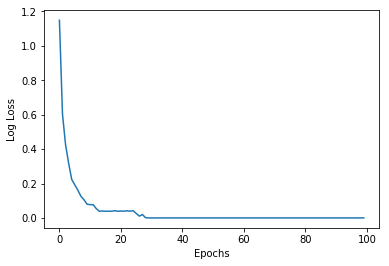

Train Accuracy :  1.0
--------------------------------------------------


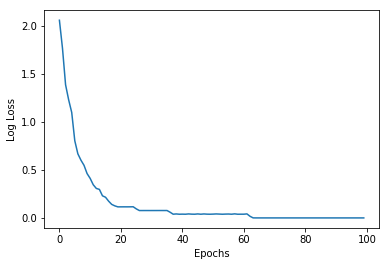

Train Accuracy :  1.0
--------------------------------------------------


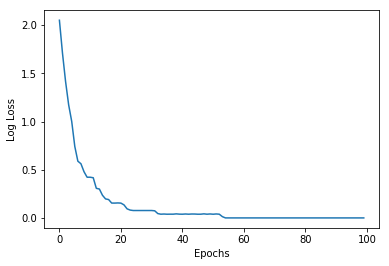

Train Accuracy :  1.0
--------------------------------------------------


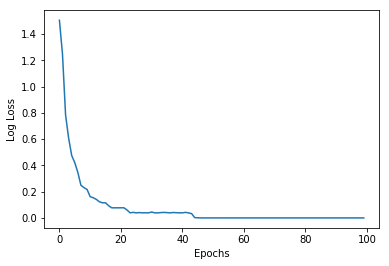

Train Accuracy :  1.0
--------------------------------------------------


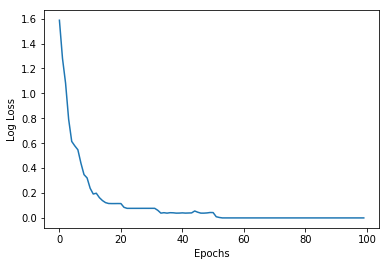

Train Accuracy :  1.0
--------------------------------------------------


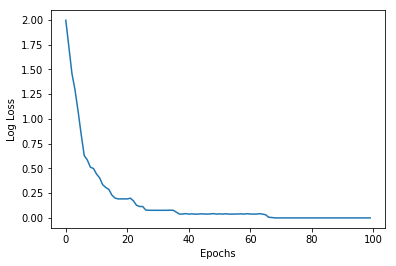

Train Accuracy :  1.0
--------------------------------------------------
CE:  0.005 1.0


In [13]:
#max_acc_mse = 0.00
max_acc_ce = 0.00
#lr_mse = 0.00
lr_ce = 0.00
i = 0.005

while(i<=0.09):   
    '''sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=i, loss_fn="mse", display_loss=True)
    temp = print_accuracy(sn_mse)
    if temp>max_acc_mse:
        max_acc_mse = temp
        lr_mse = i'''
    sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=i, loss_fn="ce", display_loss=True)
    temp1 = print_accuracy(sn_ce)
    if temp1>max_acc_ce:
        max_acc_ce = temp1
        lr_ce = i
    i += 0.005
    
#print("MSE: ", lr_mse, max_acc_mse)
print("CE: ", lr_ce, max_acc_ce)

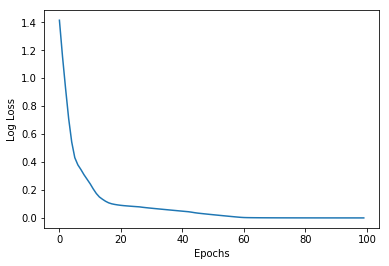

In [14]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=lr_ce, loss_fn="ce", display_loss=True)

In [15]:
Y_pred_test = (sn_ce.predict(X_scaled_test))


In [16]:
scaled_threshold = 0.5
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).ravel()*1

In [17]:
Y_pred_binarised_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [18]:
type(ID_test)

list

In [19]:
#ID_test = np.array(ID_test)

In [20]:
#ID_test

In [21]:
#Y_pred_binarised_test = pd.DataFrame(Y_pred_binarised_test)

In [22]:
#ID_test = pd.DataFrame(ID_test)

In [23]:
#D_test[0]

In [24]:
#Y_pred_binarised_test[0]

## Sample Submission

In [25]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

#submission = {}
#submission['ImageId'] = ID_test[0]
#submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame({'ImageId':ID_test, 'Class':Y_pred_binarised_test})

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values('ImageId')
submission.to_csv("submisision.csv", index=False)

In [26]:
submission

,ImageId,Class
213,0,1
36,1,0
106,2,0
46,3,1
107,4,0
72,5,1
189,6,0
251,7,1
192,8,0
151,9,1


In [27]:
imgid = submission['ImageId']

In [28]:
clas = submission['Class']

In [29]:
#submission.loc[submission['ImageId'] == 150, 'Class'].item()